# Code Breaking Part 3: Substitution Ciphers with whitespace Characters


whitespaces in the plain text have been coded with a symbol

**Easy Example**
White space is given a special character

Number | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11| 12 |13 |14 |15 |16| 17|18 |19 |20 |21 |22 |23 |24| 25| 26|
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---| ---| --- |--- |--- |--- |---| ---|--- |--- |--- |--- |--- |--- |---| ---| ---|
Plain Alphabet| a |b | c |d | e | f | g | h | i | j | k | l | m |n |o |p |q |r |s |t |u |v |w |x |y |z | | 
Cipher Alphabet| Z | X | W |K | Y | L | D | J | M | I | B | R | N |F |G |T |A |Q |P |C |E |S |H |O |U |V | # |

**Harder Example**
White space is denoted as a letter

Number | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11| 12 |13 |14 |15 |16| 17|18 |19 |20 |21 |22 |23 |24| 25| 26|
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---| ---| --- |--- |--- |--- |---| ---|--- |--- |--- |--- |--- |--- |---| ---| ---|
Plain Alphabet| a |b | c |d | e | f | g | h | i | j | k | l | m |n |o |p |q |r |s |t |u |v |w |x |y |z | | 
Cipher Alphabet| Z | X | W |K | Y | L | D | J | M | I | B | + | N |F |G |T |A |Q |P |C |E |S |H |O |U |V | R |




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10
import pandas as pd
import random
from Functions import *

In [65]:
plainAlphabet= list('abcdefghijklmnopqrstuvwxyz')

In [3]:
def prepareText_keepSpaces(text):
    '''
    This is a function to prepare a cipher text, 
    written in alphabetic characters, for analysis when we want to preserve space
    
    It does this by:
    1) removing all punctuation, whitespace, and nonalphabetic characters
    2) changing all alphabetic characters to upper case
    '''
    
    preparedText = ''
    for item in list(text):
        if item.isalpha() or item == ' ':
            preparedText = preparedText + item.upper()
    return preparedText

## Step 1) Encrypt the message

Lets encrypt using a random substituion with whitespaces replaced with a symbol

In [192]:
def Incrypt_RandomSubCipherWhiteSpace(plainText, plainAlphabet):
    
    # Add space character to the end of the plain alphabet
    plainAlphabet_withspace = plainAlphabet.copy()
    plainAlphabet_withspace.append(' ')
    
    # The cipher alphabet is the plain alphabet plus some special character randomly shuffled
    cipherAlphabet = plainAlphabet.copy()
    specialCharacters = list("!@#$%^&*_+:;<>?,./~") 
    cipherAlphabet.append(specialCharacters[ random.randint(0,len(specialCharacters)-1) ]) # Here we pick a random special character
    random.shuffle(cipherAlphabet)

    key = {}
    for i in range(len(plainAlphabet_withspace)):
        key[plainAlphabet_withspace[i].upper()] = cipherAlphabet[i].upper()

    cipherText = ''

    for plainCharacter in plainText:

        # We will translate all letters from the plain alphabet into the cipher alphabet
        if plainCharacter.isalpha() or plainCharacter == ' ':  
            cipherCharacter = key[plainCharacter]
            cipherText = cipherText + cipherCharacter
            
        # All other characters will just be copied over
        else:
            cipherText = cipherText + plainCharacter
    
    return cipherText, cipherAlphabet

In [266]:
cipherText,cipherAlphabet = Incrypt_RandomSubCipherWhiteSpace(prepareText_keepSpaces("CAN'T EAT WAFFLES"), plainAlphabet)
print(cipherText,cipherAlphabet)

YSH>QGS>QTSFFBGA ['s', 'c', 'y', 'k', 'g', 'f', 'x', 'w', 'o', 'm', 'u', 'b', 'e', 'h', 'z', 'r', 'j', 'd', 'a', '>', 'l', 'v', 't', 'p', 'n', 'i', 'q']


## Step 2) De-encrypt the cipher text

Here we will assume that we know the key and encryption method.
We essentially repeat the steps of encrypting the text but in reverse

In [194]:
def Decrypt_RandomSubCipherWhiteSpace(cipherText, plainAlphabet, cipherAlphabet):
    
    plainAlphabet_withspace = plainAlphabet.copy()
    plainAlphabet_withspace.append(' ')

    
    key = {}
    
    for i in range(len(plainAlphabet_withspace)):
        key[cipherAlphabet[i].upper()] = plainAlphabet_withspace[i].upper()
    
    plainText = ''

    for cipherCharacter in cipherText:

        # We will translate all letters from the cipher alphabet into the plain alphabet
        if cipherCharacter in key.keys():  
            plainCharacter = key[cipherCharacter.upper()]
            plainText = plainText + plainCharacter

        # All other characters will just be copied over
        else:
            plainText = plainText + cipherCharacter
    
    return plainText

In [195]:
Decrypt_RandomSubCipherWhiteSpace(cipherText, plainAlphabet, cipherAlphabet)

'CANT EAT WAFFLES'

## Step 3)  Let's try to break the encryption (pretend we do not know the shift/key)

In [210]:
# Here I am using the prologue to Quantum Mechanics by McIntyre as a sample text.  
# I apply a random shift incryption with white space characters
cipherText = removeCharacter( open('SampleTexts/QuantumPrologue.txt').read() , '\n')

cipherText, cipherAlphabet = Incrypt_RandomSubCipherWhiteSpace(prepareText_keepSpaces(cipherText), plainAlphabet  )
print(cipherText)

-18345.811606804546
LMCKNOCNCPNAICNFPCOMWAEDCFLJZMCRAKLFCZSPPYRPCSFPRACZLOCVWGRAOCNOCZRCZNPCPWFRCFSERAWSOCMLEROCMZNMOSEERACNOCMZRCKLFPCNFPCANLFCYNOZRPCNMCMZRCKLFPWKCZRCURNARPCZNGLFJCMWCARMARNMCMWCMZRCOMWAECVRYYNAWFVRCNJNLFCMZRCAROLPRFMOCWUCRAKLFOCNHNAMERFMCBSLYPLFJCOWSJZMCOZRYMRACKZRFRGRACMZRARCKRARCMZARNMOCWUMWAFNPWROCLFCMZRCNARNCKZLYRCLMCKNOCONURCPWKFCMZRARCRAKLFCURNARPCMZRCALPLVSYRCZRCKWSYPCUNVRCWFVRCNJNLFUAWECMZRCWMZRACOVZWWYCBWDOCLFCMZRCASOZCMWCMZRCVRYYNACRAKLFCORRERPCMWCNYKNDOCRFPCSHCKLMZCNCANFPWEHNLACWUCOWVIOCNFPCMZRCWMZRACBWDOCMRNORPCZLECNBWSMCLMCERAVLYROOYDFWMCMZNMCRAKLFCZNPFMCMALRPCZNAPCMWCOWYGRCMZLOCHAWBYRECZRCZNPCNCGRADCOLEHYRCVWYYRVMLWFCWUOWVIOBYNVICWACKZLMRCUWACRLMZRACOVZWWYCWACHYNDCOZWAMCWACYWFJCUWACRLMZRACMAWSORAOCWACYRPRAZWORFNUMRACMZRCULAOMCURKCMRNOLFJCRHLOWPROCUAWECMZRCWMZRACBWDOCRAKLFCZNPCOWAMRPCZLOCOWVIOCLFMWCMKWCORHNANMRPANKRAOCZRCHYNVRPCNYYCMZRCBYNVICOWVIOCLFCWFRCPANKRACNFPCNYYCMZRCKZLMRCOWVIOCLFCNFWMZRACPANKRARAKLFCULJSARPCZRCVWSYPCPRMRAELFRCNFCLFPLGLPSNYCOWVIOC

In [212]:
def removeCharacter( text , character):
    modifiedText = ''
    
    for item in list(text):
        if item != character:
            modifiedText = modifiedText + item
            
    return modifiedText

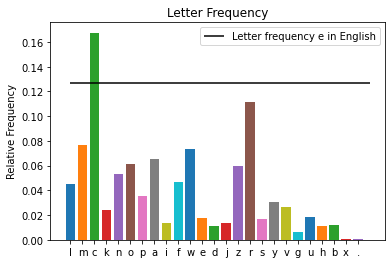

In [213]:
letterFrequencies_sampleText = letterFrequencies( cipherText )

for i,key in enumerate(letterFrequencies_sampleText):
    bar = plt.bar(i,letterFrequencies_sampleText[key])

xticks = plt.xticks(np.arange(len(letterFrequencies_sampleText.keys())),letterFrequencies_sampleText.keys())
ylabel = plt.ylabel('Relative Frequency')
title = plt.title('Letter Frequency')
plt.hlines(0.12702, 0,len(letterFrequencies_sampleText.keys()),color='black',label='Letter frequency e in English')
plt.legend()

Oh - thats totally not weird at all.   
There is a certain character which appears wayy more frequently than any others

In fact it appears wayy more often than any character does in normal english! e is the most commonly occuring letter in english, and it only appears with a frequency of 0.12 !   

Let's see what happens if we assume that this letter is a space

In [214]:
mostFrequentCharacter = [ key for key in letterFrequencies_sampleText if letterFrequencies_sampleText[key] == max(letterFrequencies_sampleText.values()) ][0]
mostFrequentCharacter

'c'

In [215]:
cipherText_removed = removeCharacter(cipherText, mostFrequentCharacter.upper() )
cipherText_removed

'LMKNONPNAINFPOMWAEDFLJZMRAKLFZSPPYRPSFPRAZLOVWGRAONOZRZNPPWFRFSERAWSOMLEROMZNMOSEERANOMZRKLFPNFPANLFYNOZRPNMMZRKLFPWKZRURNARPZNGLFJMWARMARNMMWMZROMWAEVRYYNAWFVRNJNLFMZRAROLPRFMOWURAKLFONHNAMERFMBSLYPLFJOWSJZMOZRYMRAKZRFRGRAMZRARKRARMZARNMOWUMWAFNPWROLFMZRNARNKZLYRLMKNOONURPWKFMZRARRAKLFURNARPMZRALPLVSYRZRKWSYPUNVRWFVRNJNLFUAWEMZRWMZRAOVZWWYBWDOLFMZRASOZMWMZRVRYYNARAKLFORRERPMWNYKNDORFPSHKLMZNANFPWEHNLAWUOWVIONFPMZRWMZRABWDOMRNORPZLENBWSMLMERAVLYROOYDFWMMZNMRAKLFZNPFMMALRPZNAPMWOWYGRMZLOHAWBYREZRZNPNGRADOLEHYRVWYYRVMLWFWUOWVIOBYNVIWAKZLMRUWARLMZRAOVZWWYWAHYNDOZWAMWAYWFJUWARLMZRAMAWSORAOWAYRPRAZWORFNUMRAMZRULAOMURKMRNOLFJRHLOWPROUAWEMZRWMZRABWDORAKLFZNPOWAMRPZLOOWVIOLFMWMKWORHNANMRPANKRAOZRHYNVRPNYYMZRBYNVIOWVIOLFWFRPANKRANFPNYYMZRKZLMROWVIOLFNFWMZRAPANKRARAKLFULJSARPZRVWSYPPRMRAELFRNFLFPLGLPSNYOWVIOYRFJMZLFMZRPNAIWUFLJZMOLEHYDBDURRYLFJLMBSMZRZNPMWZNGRMZREHAROWAMRPLFMWKZLMRNFPBYNVIBRVNSORMZRNHNAMERFMJRFRANYYDYWOMHWKRABRUWARMZRVNYYMWMZROZRYMRASFUWAMSFNMRYDRAKLFUWSFPMZNMMZLOHAROWAMLFJWUMZ

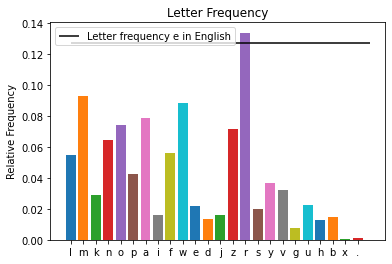

In [216]:
letterFrequencies_sampleText = letterFrequencies( cipherText_removed )

for i,key in enumerate(letterFrequencies_sampleText):
    bar = plt.bar(i,letterFrequencies_sampleText[key])

xticks = plt.xticks(np.arange(len(letterFrequencies_sampleText.keys())),letterFrequencies_sampleText.keys())
ylabel = plt.ylabel('Relative Frequency')
title = plt.title('Letter Frequency')
plt.hlines(0.12702, 0,len(letterFrequencies_sampleText.keys()),color='black',label='Letter frequency e in English')
plt.legend()

In [226]:
def findAlphabet(text):
    'Assumes all characters not in the alphabet (ie  white space and punctuation) has been removed'
    
    alphabet = []
    
    for character in text:
        if character not in alphabet:
            alphabet.append(character)
            
    return alphabet


def makeAlphabetic( text, plainAlphabet):
    '''Assume that all white space and puncutation has been removed'''
    
    textAlphabet = findAlphabet(text)
    
    charactersNotInText = [ character.upper() for character in plainAlphabet if character.upper() not in textAlphabet]
    
    nonAlphabetic = [character for character in textAlphabet if character.isalpha()== False]
        
    key = {}
    for character in textAlphabet:
        key[character] = character
    for i in range(len(nonAlphabetic)):
        key[nonAlphabetic[i]] = charactersNotInText[i]
    
    alphabeticText = ''
    for character in text:
        alphabeticText = alphabeticText +  key[character] 

    
    return alphabeticText, key

In [230]:
test, makeAlphabeticKey = makeAlphabetic( cipherText_removed , plainAlphabet)
test

'LMKNONPNAINFPOMWAEDFLJZMRAKLFZSPPYRPSFPRAZLOVWGRAONOZRZNPPWFRFSERAWSOMLEROMZNMOSEERANOMZRKLFPNFPANLFYNOZRPNMMZRKLFPWKZRURNARPZNGLFJMWARMARNMMWMZROMWAEVRYYNAWFVRNJNLFMZRAROLPRFMOWURAKLFONHNAMERFMBSLYPLFJOWSJZMOZRYMRAKZRFRGRAMZRARKRARMZARNMOWUMWAFNPWROLFMZRNARNKZLYRLMKNOONURPWKFMZRARRAKLFURNARPMZRALPLVSYRZRKWSYPUNVRWFVRNJNLFUAWEMZRWMZRAOVZWWYBWDOLFMZRASOZMWMZRVRYYNARAKLFORRERPMWNYKNDORFPSHKLMZNANFPWEHNLAWUOWVIONFPMZRWMZRABWDOMRNORPZLENBWSMLMERAVLYROOYDFWMMZNMRAKLFZNPFMMALRPZNAPMWOWYGRMZLOHAWBYREZRZNPNGRADOLEHYRVWYYRVMLWFWUOWVIOBYNVIWAKZLMRUWARLMZRAOVZWWYWAHYNDOZWAMWAYWFJUWARLMZRAMAWSORAOWAYRPRAZWORFNUMRAMZRULAOMURKMRNOLFJRHLOWPROUAWEMZRWMZRABWDORAKLFZNPOWAMRPZLOOWVIOLFMWMKWORHNANMRPANKRAOZRHYNVRPNYYMZRBYNVIOWVIOLFWFRPANKRANFPNYYMZRKZLMROWVIOLFNFWMZRAPANKRARAKLFULJSARPZRVWSYPPRMRAELFRNFLFPLGLPSNYOWVIOYRFJMZLFMZRPNAIWUFLJZMOLEHYDBDURRYLFJLMBSMZRZNPMWZNGRMZREHAROWAMRPLFMWKZLMRNFPBYNVIBRVNSORMZRNHNAMERFMJRFRANYYDYWOMHWKRABRUWARMZRVNYYMWMZROZRYMRASFUWAMSFNMRYDRAKLFUWSFPMZNMMZLOHAROWAMLFJWUMZ

In [219]:
quadFreq = quadgramFrequencies()
break_randomSubstitution( test, plainAlphabet, quadFreq )


------------ Iterarion 0
Score: -10066.71808240248
Key: ['W', 'U', 'S', 'V', 'R', 'D', 'H', 'E', 'M', 'T', 'J', 'O', 'Y', 'P', 'L', 'K', 'Q', 'F', 'A', 'Z', 'N', 'G', 'B', 'C', 'I', 'X']
Potential plain text:
OIPULUNUSYURNLIASHFROKTIESPORTCNNMENCRNESTOLDAVESLULTETUNNARERCHESACLIOHELITUILCHHESULITEPORNURNSUORMULTENUIITEPORNAPTEBEUSENTUVORKIASEISEUIIAITELIASHDEMMUSARDEUKUORITESELONERILABESPORLUGUSIHERIWCOMNORKLACKTILTEMIESPTEREVESITESEPESEITSEUILABIASRUNAELORITEUSEUPTOMEOIPULLUBENAPRITESEESPORBEUSENITESONODCMETEPACMNBUDEARDEUKUORBSAHITEAITESLDTAAMWAFLORITESCLTIAITEDEMMUSESPORLEEHENIAUMPUFLERNCGPOITUSURNAHGUOSABLADYLURNITEAITESWAFLIEULENTOHUWACIOIHESDOMELLMFRAIITUIESPORTUNRIISOENTUSNIALAMVEITOLGSAWMEHTETUNUVESFLOHGMEDAMMEDIOARABLADYLWMUDYASPTOIEBASEOITESLDTAAMASGMUFLTASIASMARKBASEOITESISACLESLASMENESTALERUBIESITEBOSLIBEPIEULORKEGOLANELBSAHITEAITESWAFLESPORTUNLASIENTOLLADYLORIAIPALEGUSUIENSUPESLTEGMUDENUMMITEWMUDYLADYLORARENSUPESURNUMMITEPTOIELADYLORURAITESNSUPESESPORBOKCSENTEDACMNNEIESHO

Of course, the key returned by the code to break a random sub cipher is not actually the key used to incrypt the message   
The message may have contained a non-alphabetic character that we replaced with any of the characters in the alphabet that hadn't been used in the cipher text. 
We should change those characters back to being the original non-alphabetic characters

This doesn't affect the decrypted message (we've already done that correclty)

In [243]:
returnedAlphabet = ['N', 'B', 'V', 'P', 'R', 'U', 'J', 'Z', 'L', 'T', 'I', 'Y', 'E', 'F', 'W', 'H', 'C', 'A', 'O', 'M', 'S', 'G', 'K', 'X', 'D', 'Q']

In [264]:
finalAlphabet = returnedAlphabet.copy()
for key in makeAlphabeticKey.keys():
    if key.isalpha() == False:
        ind = returnedAlphabet.index(makeAlphabeticKey[key])
        finalAlphabet[ind] = key
        
finalAlphabet = finalAlphabet 
print(finalAlphabet)

['N', 'B', 'V', 'P', 'R', 'U', 'J', 'Z', 'L', 'T', 'I', 'Y', 'E', 'F', 'W', 'H', '.', 'A', 'O', 'M', 'S', 'G', 'K', 'X', 'D', 'Q']
